In [1]:
import pandas as pd
import numpy as np
# import random
import scipy as sp
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.svm  import SVR
from scipy.stats import expon
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor
from tensorflow import keras 
import kerastuner as kt
import tensorflow as tf





C:\Users\User\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\User\AppData\Local\Temp\ipykernel_18140\152453301.py:28: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [2]:
# Here we just read the data
df = pd.read_csv('QT - dimension 4.csv')


df = df.drop('Unnamed: 0', axis=1)

# df = df.sample(n=10000)
# df = df.sample(n=20000)
dfnon=pd.read_csv('nonthermal - dimension 4.csv')
print(df)

# fetures: Tr((I X I) H) ,Tr( (I X Sx) H) , Tr((I X Sy) H), Tr((I X Sz) H), Tr((Sx X I)H), ... , Tr((IXI) Rho), ...
# labels: Beta

X = df[["fp hamiltonian1", "fp hamiltonian2", "fp hamiltonian3", "fp hamiltonian4", "fp hamiltonian5", "fp hamiltonian6", "fp hamiltonian7", "fp hamiltonian8", "fp hamiltonian9", "fp hamiltonian10", "fp hamiltonian11", "fp hamiltonian12", "fp hamiltonian13", "fp hamiltonian14", "fp hamiltonian15", "fp hamiltonian16", "fp rho2", "fp rho3", "fp rho4", "fp rho5", "fp rho6", "fp rho7", "fp rho8", "fp rho9", "fp rho10", "fp rho11", "fp rho12", "fp rho13", "fp rho14", "fp rho15", "fp rho16"]].to_numpy()

Y = df["beta"].to_numpy()
# Data for non-equilibrium states
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)
Xnon=dfnon[["fp hamiltonian1", "fp hamiltonian2", "fp hamiltonian3", "fp hamiltonian4", "fp hamiltonian5", "fp hamiltonian6", "fp hamiltonian7", "fp hamiltonian8", "fp hamiltonian9", "fp hamiltonian10", "fp hamiltonian11", "fp hamiltonian12", "fp hamiltonian13", "fp hamiltonian14", "fp hamiltonian15", "fp hamiltonian16", "fp rho2", "fp rho3", "fp rho4", "fp rho5", "fp rho6", "fp rho7", "fp rho8", "fp rho9", "fp rho10", "fp rho11", "fp rho12", "fp rho13", "fp rho14", "fp rho15", "fp rho16"]].to_numpy()
Ynon=dfnon['beta'].to_numpy()

       fp hamiltonian1  fp hamiltonian2  fp hamiltonian3  fp hamiltonian4  \
0             2.465892         1.343422        -0.118425        -1.009230   
1            -0.658163         0.000000         0.000000         0.223885   
2             0.632095         0.000000         0.000000        -0.478180   
3             1.003179         0.000000         0.000000        -1.427964   
4             2.455265         0.000000         0.000000        -0.581041   
...                ...              ...              ...              ...   
99995         2.160893         0.049310        -0.907184         0.733235   
99996         1.489493        -0.914604        -1.885580        -1.831748   
99997        -0.163619        -0.908653        -0.307304         0.384217   
99998         2.739235        -0.146491         0.881627         1.081060   
99999         0.055144         0.738444         0.313567        -1.603057   

       fp hamiltonian5  fp hamiltonian6  fp hamiltonian7  fp hamiltonian8  

In [3]:
print(X_test.shape, Y_test.shape, X_train.shape, Y_train.shape)

(15000, 31) (15000,) (85000, 31) (85000,)


In [4]:
from tensorflow import keras as ks

model = ks.Sequential()
model.add(ks.layers.Dense(20, activation=ks.activations.relu, input_dim =31 )  )
model.add(ks.layers.Dense(20, activation=ks.activations.relu)  )
model.add(ks.layers.Dense(1)  )
model.summary()

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,081 (4.22 KB)

 Trainable params: 1,081 (4.22 KB)

 Non-trainable params: 0 (0.00 B)

Just an arbitrary network to examine it's performance.

In [5]:
model.compile(optimizer='adam',
              loss = 'mean_squared_error'
              )

In [6]:
model.predict(X_test[:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


array([[-0.6168729],
       [-0.5257796],
       [-1.384074 ]], dtype=float32)

In [7]:
n_epoch = 15
btch_size = 20

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)

history = model.fit( x=X_train,
          y=Y_train,
          epochs=n_epoch,
          batch_size = btch_size,
          validation_data=(X_val, Y_val),
          shuffle = True
        )

Epoch 1/15
3400/3400 ━━━━━━━━━━━━━━━━━━━━ 4s 961us/step - loss: 0.1255 - val_loss: 0.0207
Epoch 2/15
3400/3400 ━━━━━━━━━━━━━━━━━━━━ 3s 998us/step - loss: 0.0163 - val_loss: 0.0104
Epoch 3/15
3400/3400 ━━━━━━━━━━━━━━━━━━━━ 3s 837us/step - loss: 0.0094 - val_loss: 0.0077
Epoch 4/15
3400/3400 ━━━━━━━━━━━━━━━━━━━━ 3s 846us/step - loss: 0.0070 - val_loss: 0.0063
Epoch 5/15
3400/3400 ━━━━━━━━━━━━━━━━━━━━ 3s 993us/step - loss: 0.0061 - val_loss: 0.0057
Epoch 6/15
3400/3400 ━━━━━━━━━━━━━━━━━━━━ 3s 856us/step - loss: 0.0055 - val_loss: 0.0052
Epoch 7/15
3400/3400 ━━━━━━━━━━━━━━━━━━━━ 3s 854us/step - loss: 0.0051 - val_loss: 0.0048
Epoch 8/15
3400/3400 ━━━━━━━━━━━━━━━━━━━━ 3s 906us/step - loss: 0.0048 - val_loss: 0.0048
Epoch 9/15
3400/3400 ━━━━━━━━━━━━━━━━━━━━ 3s 835us/step - loss: 0.0046 - val_loss: 0.0047
Epoch 10/15
3400/3400 ━━━━━━━━━━━━━━━━━━━━ 3s 825us/step - loss: 0.0045 - val_loss: 0.0046
Epoch 11/15
3400/3400 ━━━━━━━━━━━━━━━━━━━━ 3s 839us/step - loss: 0.0043 - val_loss: 0.0043
Epoch 12

In [8]:
def score_model(Y_test, Y_pred):
    u=0
    v=0
    for i in range(len(Y_test)):
        u += ((Y_test[i] - Y_pred[i])**2).sum()
        v += ((Y_test[i] - np.mean(Y_test))**2).sum()

    return 1 - u/v

In [9]:
scorete = score_model( Y_test, model.predict(X_test))
mtx=model.predict(X_train)
scoretr=score_model( Y_train, mtx)
print('Test Score: ' + str( scorete)    + '  Train Score: ' + str( scoretr ))

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step
2125/2125 ━━━━━━━━━━━━━━━━━━━━ 2s 709us/step
Test Score: 0.9502387778115342  Train Score: 0.9537747515896084


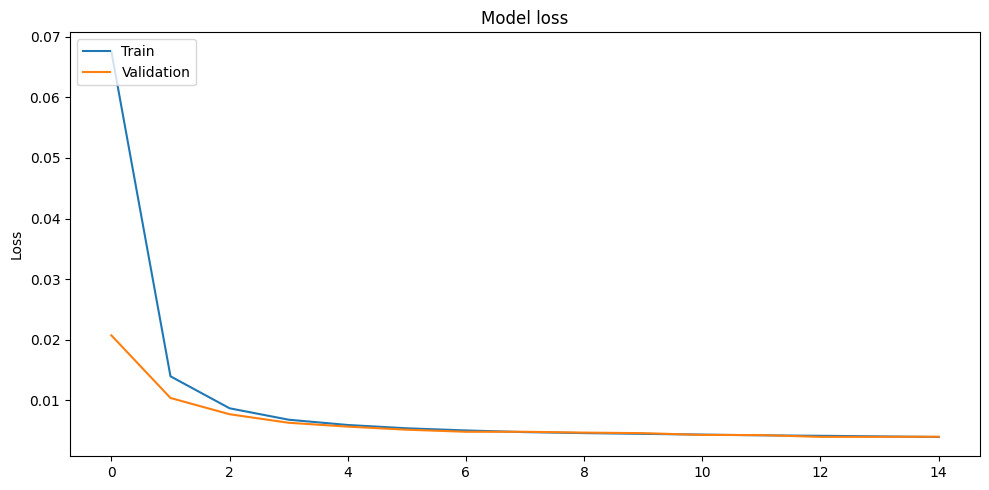

In [10]:
fig = plt.figure(figsize=(10,5))

# Plot training & validation loss values
ax = fig.add_subplot(1,1,1, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [11]:
results = model.evaluate(X_test, Y_test)
print("test loss:", results)
results = model.evaluate(Xnon, Ynon)
print("non-thermal loss:", results)
score=score_model(Ynon,model.predict(Xnon))
print(score)

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 0.0040
test loss: 0.004088064190000296
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.8016
non-thermal loss: 0.8029491901397705
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step
-3.9632432680884238


As expected, the model does not work well on non-thermal density matrices.

In [12]:
history.history

{'loss': [0.06754793226718903,
  0.013982501812279224,
  0.008707772009074688,
  0.006823921576142311,
  0.005950883962213993,
  0.005407422780990601,
  0.0050523290410637856,
  0.004777669440954924,
  0.004614627920091152,
  0.004488041624426842,
  0.004369736649096012,
  0.004246095661073923,
  0.004168154206126928,
  0.0040728081949055195,
  0.0039700609631836414],
 'val_loss': [0.020736662670969963,
  0.010408410802483559,
  0.007726836483925581,
  0.006319212261587381,
  0.005683779250830412,
  0.005176176317036152,
  0.004833722021430731,
  0.004833655431866646,
  0.004696986638009548,
  0.0046082125045359135,
  0.0043138163164258,
  0.004286709241569042,
  0.003989711869508028,
  0.003994665574282408,
  0.004019996151328087]}

In [13]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(31,)))
  hp_units = hp.Int('units', min_value=4, max_value=24, step=2)
  model.add(keras.layers.Dense(units=hp_units,
                               activation='relu'))
  hp_units2 = hp.Int('units2', min_value=4, max_value=24, step=2)
  model.add(keras.layers.Dense(units=hp_units2,
                               activation='relu'))
  model.add(keras.layers.Dense(1))
  learning_rate=0.001
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                loss='mean_squared_error')
  return model

Here we tune parameters assuming a fixed number of layers.

In [15]:
tuner = kt.Hyperband(model_builder,
                     objective='val_loss'
                     ,max_epochs=10,overwrite=True
                    #  max_epochs=15,
                    #  factor=3
                     )
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train, Y_train,
             epochs=30,
             batch_size = 100,
             validation_split=0.2,
             callbacks=[stop_early])
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and The optimal number of units in the second densely-connected
layer is {best_hps.get('units2')} .
""")


Trial 30 Complete [00h 00m 07s]
val_loss: 0.007886365987360477

Best val_loss So Far: 0.005942196119576693
Total elapsed time: 00h 01m 46s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 20 and The optimal number of units in the second densely-connected
layer is 18 .



In [16]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, Y_train,
                    epochs=15,
                    batch_size = 100,
                    validation_data=(X_test, Y_test))

val_loss_per_epoch = history.history['val_loss']
best_epoch = val_loss_per_epoch.index(min(val_loss_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/15
680/680 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3744 - val_loss: 0.0839
Epoch 2/15
680/680 ━━━━━━━━━━━━━━━━━━━━ 1s 853us/step - loss: 0.0799 - val_loss: 0.0573
Epoch 3/15
680/680 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step - loss: 0.0492 - val_loss: 0.0303
Epoch 4/15
680/680 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - loss: 0.0268 - val_loss: 0.0194
Epoch 5/15
680/680 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step - loss: 0.0174 - val_loss: 0.0141
Epoch 6/15
680/680 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step - loss: 0.0130 - val_loss: 0.0112
Epoch 7/15
680/680 ━━━━━━━━━━━━━━━━━━━━ 1s 846us/step - loss: 0.0106 - val_loss: 0.0096
Epoch 8/15
680/680 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - loss: 0.0093 - val_loss: 0.0087
Epoch 9/15
680/680 ━━━━━━━━━━━━━━━━━━━━ 1s 836us/step - loss: 0.0085 - val_loss: 0.0081
Epoch 10/15
680/680 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - loss: 0.0080 - val_loss: 0.0077
Epoch 11/15
680/680 ━━━━━━━━━━━━━━━━━━━━ 1s 850us/step - loss: 0.0074 - val_loss: 0.0073
Epoch 12/15
680/680 ━━━━━━━━━━━━

In [17]:
results = model.evaluate(Xnon, Ynon)
print("non-thermal loss:", results)
print(Y_test[[200]],model.predict(X_test[[200]]))

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - loss: 0.6832
non-thermal loss: 0.6825025081634521
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[0.52305971] [[0.5169214]]


In [18]:
scorete = score_model( Y_test, model.predict(X_test))
mtx=model.predict(X_train)
scoretr=score_model( Y_train, mtx)
print('Test Score: ' + str( scorete)    + '  Train Score: ' + str( scoretr ))

469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step
2125/2125 ━━━━━━━━━━━━━━━━━━━━ 2s 724us/step
Test Score: 0.9284870556092016  Train Score: 0.9318395618779096


In [19]:
score=score_model(Ynon,model.predict(Xnon))
print(score)

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step
-3.2187296409687347


The model still can not get the non-equilibrium temperature according to the formula.

In [20]:
print(model.predict(Xnon[:6]),Ynon[:6])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[0.6212263 ]
 [0.7045847 ]
 [0.8692237 ]
 [0.93623674]
 [1.143689  ]
 [0.51134133]] [-0.45966075  0.02050998  0.530993    0.01530348 -0.22772197  0.18465498]


In [21]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(31,)))
    for i in range(1, hp.Int("num_layers", 2, 6)):
        model.add(
            keras.layers.Dense(
                units=hp.Int("units_" + str(i), min_value=4, max_value=32, step=4),
                activation="relu")
            )
    model.add(keras.layers.Dense(units=1))
    hp_learning_rate = 0.001#hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss='mean_squared_error')
    return model

In [22]:
tuner = kt.Hyperband(build_model,
                     objective='val_loss',
                     max_epochs=20,
                     factor=3,
                     directory='my_dir',
                     project_name='qt')
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train, Y_train,
             epochs=50,
             batch_size = 100,
             validation_split=0.2,
             callbacks=[stop_early])
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete. The optimal values are {best_hps.values}.
""")

Trial 30 Complete [00h 00m 13s]
val_loss: 0.008274456486105919

Best val_loss So Far: 0.0033178371377289295
Total elapsed time: 00h 03m 12s

The hyperparameter search is complete. The optimal values are {'num_layers': 6, 'units_1': 32, 'units_2': 24, 'units_3': 20, 'units_4': 24, 'units_5': 8, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0012'}.



In [23]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, Y_train,
                    epochs=15,
                    batch_size = 100,
                    validation_data=(X_test, Y_test))

val_loss_per_epoch = history.history['val_loss']
best_epoch = val_loss_per_epoch.index(min(val_loss_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/15
680/680 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0913 - val_loss: 0.0396
Epoch 2/15
680/680 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0266 - val_loss: 0.0119
Epoch 3/15
680/680 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0105 - val_loss: 0.0082
Epoch 4/15
680/680 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0077 - val_loss: 0.0067
Epoch 5/15
680/680 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0065 - val_loss: 0.0059
Epoch 6/15
680/680 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0056 - val_loss: 0.0054
Epoch 7/15
680/680 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0050 - val_loss: 0.0048
Epoch 8/15
680/680 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0045 - val_loss: 0.0045
Epoch 9/15
680/680 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0042 - val_loss: 0.0044
Epoch 10/15
680/680 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 11/15
680/680 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0037 - val_loss: 0.0039
Epoch 12/15
680/680 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [24]:
results = model.evaluate(Xnon, Ynon)
print("non-thermal loss:", results)
print(Y_test[[200]],model.predict(X_test[[200]]))
scorete = score_model( Y_test, model.predict(X_test))
mtx=model.predict(X_train)
scoretr=score_model( Y_train, mtx)
print('Test Score: ' + str( scorete)    + '  Train Score: ' + str( scoretr ))
score=score_model(Ynon,model.predict(Xnon))
print('non-thermal score: '+str(score))

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - loss: 0.6069
non-thermal loss: 0.6092033386230469
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[0.52305971] [[0.48919386]]
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step
2125/2125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Test Score: 0.959992120658665  Train Score: 0.9644573468906925
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 830us/step
non-thermal score: -2.7656477916019337


The train and test scores are better than other methods(Regression, Random forest and...) as was seen in the second phase, and we did not use regularization because it damaged the model's performance and the train and test scores are not to different to make us worry about overfitting. Still, the performance on non-thermal mattrices is bad just like other models excpet for SVR that had a positive score but that was not good enough either. We therefore found no method that would give the same results as the thermal systems for non-equilibrium systems.

In [26]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 31)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 24)             │           792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20)             │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 24)             │           504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,089 (35.51 KB)

 Trainable params: 3,029 (11.83 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,060 (23.68 KB)

In [27]:
from sklearn.metrics import r2_score
data_sizes = [len(df)//10, len(df)//7, len(df)//5, len(df)//3, len(df)//2, len(df) ]



train_scores= []
test_scores = []


for data_size in data_sizes:
    
    df1 = df.sample(n=data_size)
    X = df1[["fp hamiltonian1", "fp hamiltonian2", "fp hamiltonian3", "fp hamiltonian4", "fp hamiltonian5", "fp hamiltonian6", 
            "fp hamiltonian7", "fp hamiltonian8", "fp hamiltonian9", "fp hamiltonian10", "fp hamiltonian11", "fp hamiltonian12", "fp hamiltonian13", "fp hamiltonian14", 
            "fp hamiltonian15", "fp hamiltonian16", "fp rho2", "fp rho3", "fp rho4", "fp rho5", "fp rho6", "fp rho7", "fp rho8", "fp rho9", "fp rho10", "fp rho11", "fp rho12", 
            "fp rho13", "fp rho14", "fp rho15", "fp rho16"]].to_numpy()
    Y = df1["beta"].to_numpy()
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


    free_params = 16



    model = ks.Sequential()
    model.add(ks.layers.Dense(32, activation=ks.activations.relu, input_dim = 31)  )
    model.add(ks.layers.Dense(24, activation=ks.activations.relu) )
    model.add(ks.layers.Dense(20, activation=ks.activations.relu) )
    model.add(ks.layers.Dense(24, activation=ks.activations.relu) )
    model.add(ks.layers.Dense(8, activation=ks.activations.relu)  )
    model.add(ks.layers.Dense(1)  )
    # model.summary()


    model.compile(optimizer= 'adam',
              loss = 'mean_squared_error'
              )
    

    n_epoch = 30
    btch_size = 200

    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)

    history = model.fit( x=X_train,
            y=Y_train,
            epochs=n_epoch,
            batch_size = btch_size,
            validation_data=(X_val, Y_val),
            shuffle = True
            )
    
    train_scores.append(  r2_score(Y_train,model.predict(X_train)) )
    test_scores.append(  r2_score(Y_test,model.predict(X_test)) )


Epoch 1/30


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5102 - val_loss: 0.3062
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3053 - val_loss: 0.2461
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2126 - val_loss: 0.0977
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0950 - val_loss: 0.0903
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0888 - val_loss: 0.0874
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0862 - val_loss: 0.0862
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0836 - val_loss: 0.0845
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0806 - val_loss: 0.0833
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0801 - val_loss: 0.0821
Epoch 10/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0787 - val_loss: 0.0808
Epoch 11/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0762 - val_loss: 0.0794
Epoch 12/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0760 - val_loss: 0.0776


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1590 - val_loss: 0.0945
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0919 - val_loss: 0.0884
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0858 - val_loss: 0.0850
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0832 - val_loss: 0.0826
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0796 - val_loss: 0.0809
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0792 - val_loss: 0.0789
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0754 - val_loss: 0.0777
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0725 - val_loss: 0.0741
Epoch 9/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0682 - val_loss: 0.0703
Epoch 10/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0646 - val_loss: 0.0650
Epoch 11/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0577 - val_loss: 0.0572
Epoch 12/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0494 - val_loss: 0.0475


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1511 - val_loss: 0.0924
Epoch 2/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0900 - val_loss: 0.0854
Epoch 3/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0845 - val_loss: 0.0818
Epoch 4/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0802 - val_loss: 0.0790
Epoch 5/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0760 - val_loss: 0.0748
Epoch 6/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0722 - val_loss: 0.0684
Epoch 7/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0631 - val_loss: 0.0575
Epoch 8/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0506 - val_loss: 0.0445
Epoch 9/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0378 - val_loss: 0.0338
Epoch 10/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0283 - val_loss: 0.0268
Epoch 11/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0225 - val_loss: 0.0223
Epoch 12/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0186 - val_loss: 0.0185


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1823 - val_loss: 0.0848
Epoch 2/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0833 - val_loss: 0.0799
Epoch 3/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0796 - val_loss: 0.0760
Epoch 4/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0722 - val_loss: 0.0631
Epoch 5/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0553 - val_loss: 0.0366
Epoch 6/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0308 - val_loss: 0.0237
Epoch 7/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0206 - val_loss: 0.0186
Epoch 8/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0160 - val_loss: 0.0154
Epoch 9/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0132 - val_loss: 0.0131
Epoch 10/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0112 - val_loss: 0.0120
Epoch 11/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0102 - val_loss: 0.0109
Epoch 12/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2799 - val_loss: 0.0875
Epoch 2/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0857 - val_loss: 0.0825
Epoch 3/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0804 - val_loss: 0.0794
Epoch 4/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0760 - val_loss: 0.0744
Epoch 5/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0689 - val_loss: 0.0601
Epoch 6/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0520 - val_loss: 0.0368
Epoch 7/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0318 - val_loss: 0.0233
Epoch 8/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0200 - val_loss: 0.0172
Epoch 9/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0145 - val_loss: 0.0132
Epoch 10/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0116 - val_loss: 0.0111
Epoch 11/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0097 - val_loss: 0.0094
Epoch 12/30
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1039 - val_loss: 0.0716
Epoch 2/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0576 - val_loss: 0.0218
Epoch 3/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0181 - val_loss: 0.0121
Epoch 4/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0108 - val_loss: 0.0090
Epoch 5/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0083 - val_loss: 0.0077
Epoch 6/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0071 - val_loss: 0.0067
Epoch 7/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0062 - val_loss: 0.0061
Epoch 8/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0059 - val_loss: 0.0058
Epoch 9/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0053 - val_loss: 0.0054
Epoch 10/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0051 - val_loss: 0.0051
Epoch 11/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0048 - val_loss: 0.0050
Epoch 12/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.

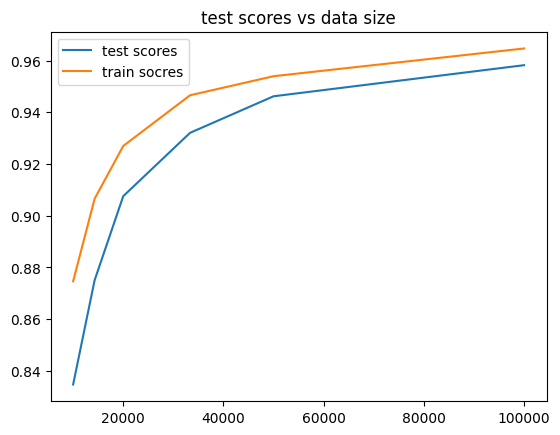

In [32]:
test_scores=np.array(test_scores)
train_scores=np.array(train_scores)
plt.plot(data_sizes,test_scores,label='test scores')
plt.plot(data_sizes,train_scores,label='train socres')
plt.title('test scores vs data size')
plt.legend()
plt.show()

The variations of the scores W.R.T data size shows that we have enough data.